# 1.0 Getting movie links for scraping

In [50]:
# Get Soup
import requests
from bs4 import BeautifulSoup
import re
import dateutil.parser

##Page list 
pagelist2015 = ['http://www.boxofficemojo.com/yearly/chart/?page=1&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2015&p=.htm']
pagelist2014 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2014&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2013 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2013&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2012 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2012&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2011 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2011&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist = pagelist2015 + pagelist2014 + pagelist2013 + pagelist2012 + pagelist2011

In [51]:
##Find movie links based on page list
movielist = []
for page in pagelist:
    url = page
    response = requests.get(url,headers={'Microsoft Edge':'Metis data science student scraping project'})
    soup = BeautifulSoup(response.text)
    for x in soup.find_all('a'):
        try:
            if "/movies/?id" in x['href']:
                movielist.append(x['href'])
            else:
                continue
        except:
            continue
            
##Translate movie links into full html addresses
htmllist = []
for x in movielist:
    htmllist.append('http://www.boxofficemojo.com'+x+'&adjust_yr=2015&p=.htm')

C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [52]:
len(htmllist)

3388

# 2.0 Scraping Script

In [53]:
## Import BeautifulSoup and scraping modules
from bs4 import BeautifulSoup
import requests
import re
url = 'http://www.boxofficemojo.com/movies/?id=fruitvale.htm'
response = requests.get(url,headers={'Microsoft Edge':'Metis data science student scraping project'})
soup = BeautifulSoup(response.text)

C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


## 2.1 Subfunctions to extract data from movie webpages

In [54]:
##Get movie title
def get_movie_title(soup):
    try:
        return soup.find('title').text.split('-')[0].split('(')[0].strip()
    except:
        return None

##Get movie domestic box office gross
def get_movie_domestic_gross(soup):
    try:
        return float(soup.find_all('b')[2].text.replace('$','').replace(',',''))/(10**6)
    except:
        return None
    
##Get movie distributor
def get_movie_distributor(soup):
    try:
        return soup.find(text=re.compile('Distributor')).findNextSibling().text.replace('/',' ').split()[0]
    except:
        return None
    
##Get movie release date
def get_movie_release_date(soup):
    try:
        datestring = soup.find(text=re.compile('Release Date')).findNextSibling().text
        date = dateutil.parser.parse(datestring)
        return date
    except:
        return None
        
##Get movie genre
def get_movie_genre(soup):
    try:
        return soup.find(text=re.compile('Genre:')).findNextSibling().text.split()[0]
    except:
        return None
    
##Get movie runtime
def get_movie_runtime(soup):
    try:
        runtime_string= soup.find(text=re.compile('Runtime')).findNextSibling().text.split()
        return float(runtime_string[0])*60 + float(runtime_string[2])
    except:
        return None

##Get movie MPAA rating
def get_movie_mpaa_rating(soup):
    try:
        return soup.find(text=re.compile('MPAA')).findNextSibling().text
    except:
        return None

##Get movie production budget
def get_movie_prod_budget(soup):
    try:
        prod_budget_string = soup.find(text=re.compile('Production Budget')).findNextSibling().text.replace('$','').replace(',','')
        if 'million' in prod_budget_string:
            return float(prod_budget_string.split()[0])
        else:
            return None
    except:
        return None

##Get movie opening weekend gross
def get_movie_weekend_gross(soup):
    if soup.find(text=re.compile('Wide\xa0Opening')):
        try:
            return float(soup.find(text=re.compile('Wide\xa0Opening')).findNext().text.replace('$','').replace(',',''))/(10**6)
        except:
            return None
    elif soup.find(text=re.compile('Opening\xa0Weekend')):
        try:
            return float(soup.find(text=re.compile('Opening\xa0Weekend')).findNext().text.replace('$','').replace(',',''))/(10**6)
        except:
            return None
    else:
        return None

##Get movie in release days
def get_movie_release_days(soup):
    try:
        return abs(float(soup.find(text=re.compile("In Release")).findNext().text.strip().split()[0]))
    except:
        return None
    

##Get movie widest # of theaters:
def get_movie_no_theaters(soup):
    try:
        return abs(float(soup.find(text=re.compile("Widest")).findNext().text.replace(',','').split()[0]))
    except:
        return None

## 2.2  Combine subfunctions into one function

In [55]:
def get_movie_data(soup):
    datalist = []
    datalist.append(get_movie_title(soup))
    datalist.append(get_movie_domestic_gross(soup))
    datalist.append(get_movie_distributor(soup))
    datalist.append(get_movie_release_date(soup))
    datalist.append(get_movie_genre(soup))
    datalist.append(get_movie_runtime(soup))
    datalist.append(get_movie_mpaa_rating(soup))
    datalist.append(get_movie_prod_budget(soup))
    datalist.append(get_movie_weekend_gross(soup))
    datalist.append(get_movie_release_days(soup))
    datalist.append(get_movie_no_theaters(soup))
    df.append(datalist)

## 2.3 Loop through links and combine into one data frame

In [56]:
##Set df as master list
df = []
for link in htmllist:
    response = requests.get(link,headers={'Microsoft Edge':'Metis data science student scraping project'})
    soup = BeautifulSoup(response.text)
    get_movie_data(soup)

C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [57]:
import pandas as pd
DF = pd.DataFrame(df, columns = ['title','dom_gross_adj_2015','distributor','release_date','genre','runtime','rating','budget','weekend_gross','in_release_days','max_no_theaters'])
DF.drop_duplicates()
DF.shape

(3388, 11)

### Checkpoint 1: Pickle

##Pickle
import pickle
with open('my_data.pkl', 'wb') as picklefile:
    pickle.dump(DF, picklefile)

In [58]:
##Take out of jar
import pickle
import pandas as pd
import numpy as np
import math
import matplotlib
import datetime
import calendar
%matplotlib inline
with open("my_data.pkl", 'rb') as picklefile: 
    DF = pickle.load(picklefile)
DF2 = DF.copy()

In [59]:
def get_month(x):
    try:
        return calendar.month_name[x.month]
    except:
        return None
    
def get_weekday(x):
    return x.isoweekday()

def get_monthday(x):
    return x.day

def get_year(x):
    return x.year

DF2["release_month"] = DF2["release_date"].apply(get_month)
DF2["release_weekday"] = DF2["release_date"].apply(get_weekday)
DF2["release_monthday"] = DF2["release_date"].apply(get_monthday)
DF2["release_year"] = DF2["release_date"].apply(get_year)

In [60]:
##Data filters this early to execute the rest of the script faster
DF2 = DF2[(DF2["release_year"] >= 2011) & (DF2["release_year"] < 2016)]
DF2 = DF2[DF2['genre'] != 'Foreign']
DF2 = DF2[DF2['dom_gross_adj_2015']<600]
DF2 = DF2.dropna()
DF2 = DF2[(DF2.dom_gross_adj_2015>1) & (DF2.budget>1)].reset_index(drop=True)

In [61]:
##Create genre density count for each movie
##Very slow but no choice but to loop through the data frame
month_count_list = []
two_month_count_list = []
for current_row in range(DF2.shape[0]):
    month_count = 0.0
    two_month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF.release_date -compare_DF.release_date).days)
        except:
            time_delta = 100
        if time_delta <= 30 and (current_DF.genre == compare_DF.genre) and current_DF.title != compare_DF.title:
            month_count +=1
        if time_delta <= 60 and compare_DF.budget >= 100 and current_DF.title != compare_DF.title:
            two_month_count +=1
    month_count_list.append(month_count)
    two_month_count_list.append(two_month_count)
month_count_list = pd.Series(month_count_list)
two_month_count_list = pd.Series(two_month_count_list)

In [62]:
##Create high budget density count for each movie
##Very slow but no choice but to loop through the data frame
budget_month_count_list = []
budget_two_month_count_list = []
for current_row in range(DF2.shape[0]):
    month_count = 0.0
    two_month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF.release_date - compare_DF.release_date).days)
        except:
            time_delta = 100  
        if time_delta <= 30 and compare_DF.budget >= 100 and current_DF.title != compare_DF.title:
            month_count +=1
        if time_delta <= 60 and compare_DF.budget >= 100 and current_DF.title != compare_DF.title:
            two_month_count +=1
    budget_month_count_list.append(month_count)
    budget_two_month_count_list.append(two_month_count)
budget_month_count_list = pd.Series(budget_month_count_list)
budget_two_month_count_list = pd.Series(budget_two_month_count_list)

In [63]:
DF2["two_month_genre_density_count"] = two_month_count_list
DF2["month_genre_density_count"] = month_count_list
DF2["two_month_budget_density_count"] = budget_two_month_count_list
DF2["month_budget_density_count"] = budget_month_count_list

### Checkpoint 2: Pickle after creating density counts

In [64]:
##Pickle checkpoint
import pickle
with open('my_data2.pkl', 'wb') as picklefile:
    pickle.dump(DF2, picklefile)

In [65]:
with open("my_data2.pkl", 'rb') as picklefile: 
    DF2 = pickle.load(picklefile)

## Further data transformations

In [66]:
DF2.release_month = DF2.release_month.astype('category')
DF2.release_weekday = DF2.release_weekday.astype('category')
DF2.release_monthday = DF2.release_monthday.astype('category')
DF2.release_year = DF2.release_year.astype('category')
DF2.distributor = DF2.distributor.astype('category')
DF2.genre = DF2.genre.astype('category')
DF2.rating = DF2.rating.astype('category')

In [67]:
small_distributors = ['CBS','FilmDistrict','Summit','Roadside','Samuel','STX','Freestyle','Anchor','Well','High','Kenn','Newmarket','Oscilloscope','Picturehouse','Quaker','Rocky','A24']
def small_distributor(x):
    if x in small_distributors:
        return "Others"
    else:
        return x

In [68]:
DF2['distributor'] = DF2['distributor'].apply(small_distributor)

In [69]:
other_genres = ['Romantic','Romance','Musical','Sports','Adventure','Period','Western','Documentary','War','Concert','Music','Historical']
def other_genre(x):
    if x in other_genres:
        return "Others"
    else:
        return x

In [70]:
DF2['genre'] = DF2['genre'].apply(other_genre)

In [71]:
DF2['theater_squared'] = np.power(ENDF['max_no_theaters'],2)

### Checkpoint 3: Pickle after data transformations

In [72]:
##Pickle checkpoint
import pickle
with open('my_data3.pkl', 'wb') as picklefile:
    pickle.dump(DF2, picklefile)

In [73]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels
%matplotlib inline
with open("my_data3.pkl", 'rb') as picklefile: 
    masterDF = pickle.load(picklefile)

# Turn in operational dataset to run regressions on

In [74]:
##Create dummy variables for categorical variables
opDF = masterDF.copy()
genre_dummy = pd.get_dummies(opDF['genre'])
distributor_dummy = pd.get_dummies(opDF['distributor'])
month_dummy = pd.get_dummies(opDF['release_month'])

opDF = pd.concat([masterDF,genre_dummy,distributor_dummy,month_dummy],axis=1)

In [76]:
##Delete non-essential variables
opDF = opDF.drop(['genre','distributor','release_month','Action','Buena','January','title','rating','release_date','release_weekday','release_monthday','release_year','weekend_gross'],axis=1)

# 3.0 Exploratory Analysis

In [80]:
#Create copy just to be sure
DF3 = opDF.copy()

From the pairplots above, there's a strong non-linear relationship between budget and the maximum number of theaters. There's a risk of multicollinearity.

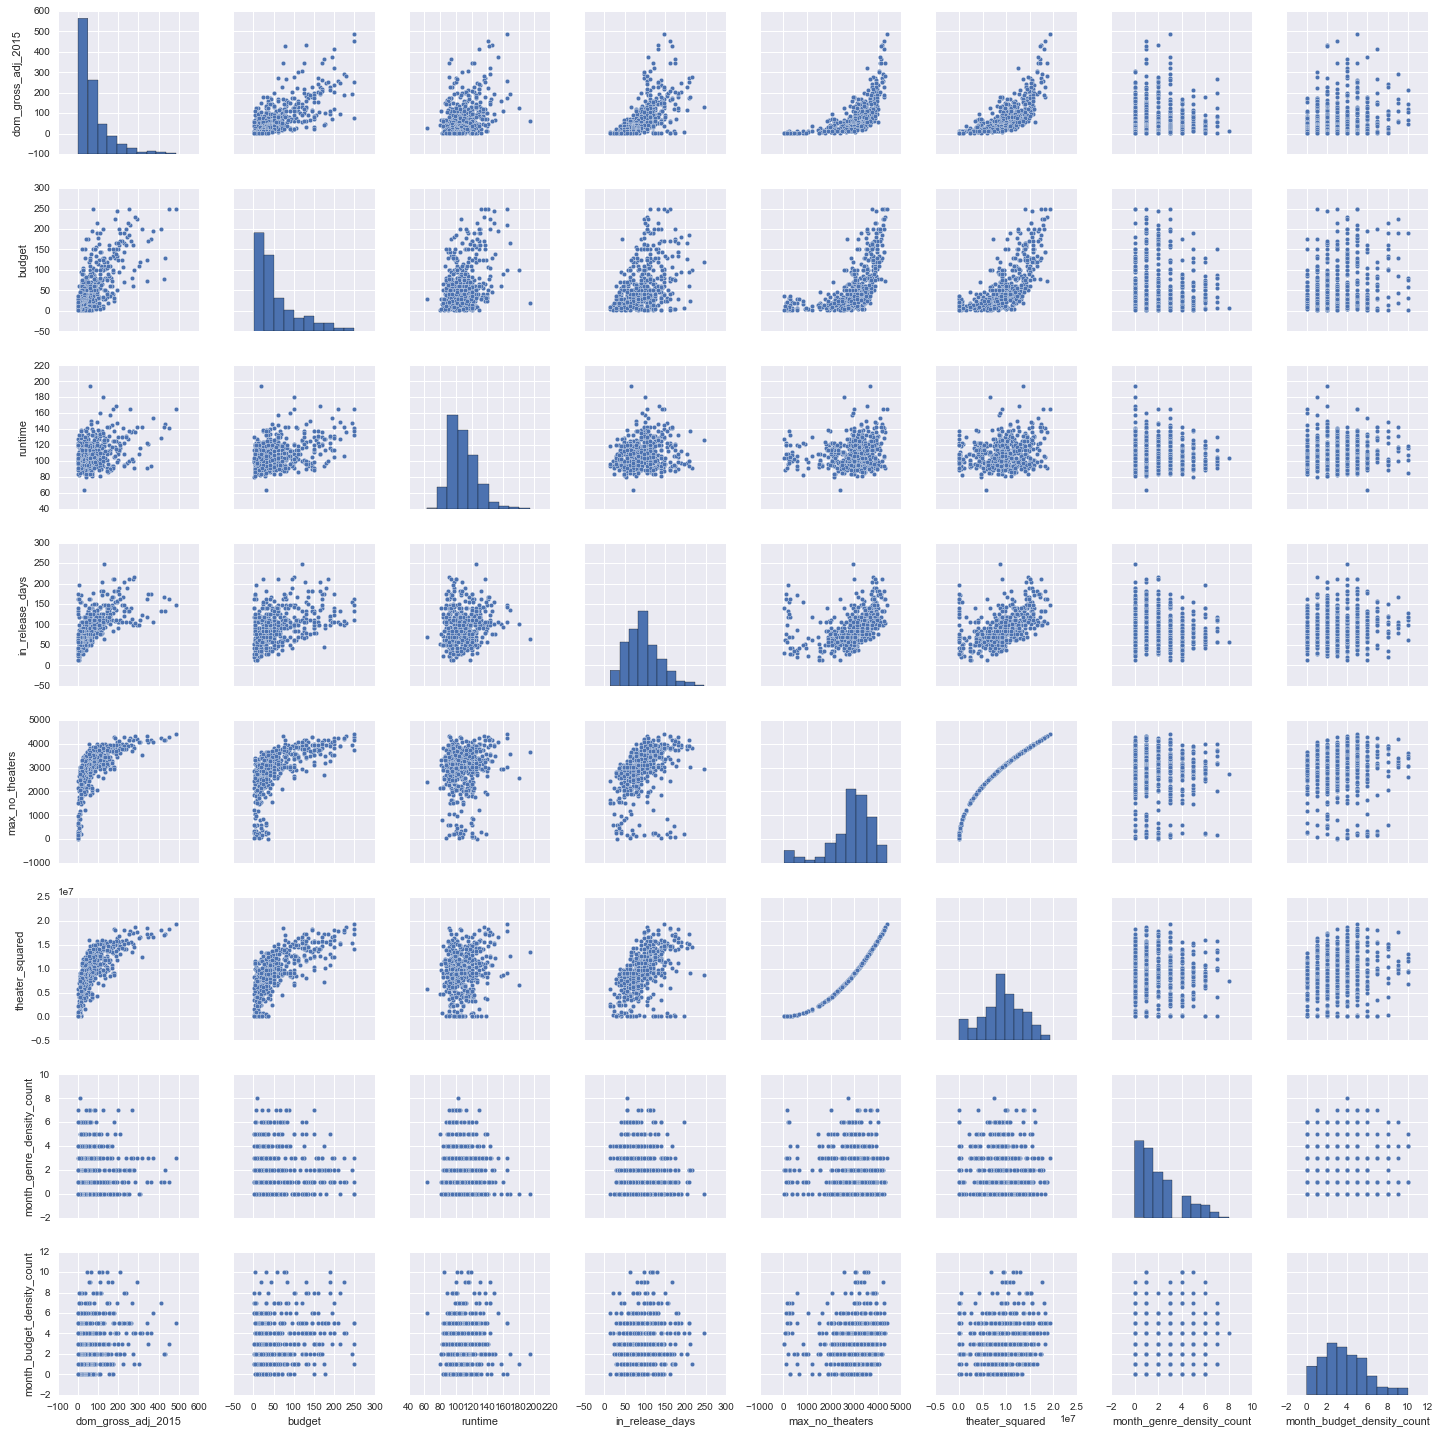

In [83]:
pairDF = DF3[['dom_gross_adj_2015','budget','runtime','in_release_days','max_no_theaters','theater_squared','month_genre_density_count','month_budget_density_count']]
sns.pairplot(pairDF);

# 4.0 Regression Model

In [201]:
##Separate OLS DataFrame
OLSDF = opDF.copy()
OLSDF = statsmodels.tools.tools.add_constant(OLSDF,prepend=False)
mask = np.random.random(OLSDF.shape[0])<0.8
OLSDF_train = OLSDF[mask]
OLSDF_test = OLSDF[~mask]

In [202]:
OLSDF_train_Y = OLSDF_train.iloc[:,0]
OLSDF_train_X = OLSDF_train.iloc[:,1:]

In [254]:
##Including everything to compare with elastic net
lm = smf.OLS(OLSDF_train_Y,OLSDF_train_X,hasconst=True)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dom_gross_adj_2015   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     24.05
Date:                Wed, 27 Apr 2016   Prob (F-statistic):           1.74e-78
Time:                        19:40:29   Log-Likelihood:                -1988.5
No. Observations:                 391   AIC:                             4061.
Df Residuals:                     349   BIC:                             4228.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
runtime                            0.5261      0.170      3.094      0.002         0.192     0.861
budget                             0.2353      0.074      3.176      0.002         0.090     0.381
in_release_days                    0.6450      0.078      8.254      0.000         0.491     0.799
max_no_theaters                   -0.0369      0.011     -3.407      0.001        -0.058    -0.016
two_month_genre_density_count      0.2656      0.752      0.353      0.724        -1.214     1.745
month_genre_density_count         -0.5600      1.667     -0.336      0.737        -3.839     2.719
two_month_budget_density_count     0.2656      0.752      0.353      0.724        -1.214     1.745
month_budget_density_count        -1.3090      2.515     -0.520      0.603        -6.256     3.638
theater_squared                 1.604e-05    2.6e-06      6.178      0.000      1.09e-05  2.11e-05
Animation                        -22.1949     11.423     -1.943      0.053       -44.661     0.271
Comedy                            -1.2090      8.289     -0.146      0.884       -17.512    15.095
Crime                             -3.4750     16.868     -0.206      0.837       -36.651    29.701
Drama                             -6.0100      9.897     -0.607      0.544       -25.476    13.456
Family                           -31.7404     15.286     -2.076      0.039       -61.805    -1.675
Fantasy                          -25.0780     15.501     -1.618      0.107       -55.564     5.408
Horror                             3.0251     10.786      0.280      0.779       -18.188    24.238
Others                            -8.0820     10.345     -0.781      0.435       -28.428    12.264
Sci-Fi                           -26.5843      9.564     -2.780      0.006       -45.395    -7.773
Thriller                           2.5080     11.244      0.223      0.824       -19.606    24.622
Focus                             13.8359     16.317      0.848      0.397       -18.255    45.927
Fox                              -14.9883      9.944     -1.507      0.133       -34.547     4.570
Lionsgate                         24.3826     12.003      2.031      0.043         0.774    47.991
Open                              15.4106     16.531      0.932      0.352       -17.102    47.923
Others                            25.8441     12.389      2.086      0.038         1.478    50.210
Paramount                         27.1423     11.315      2.399      0.017         4.888    49.397
Relativity                        -1.4603     13.228     -0.110      0.912       -27.477    24.557
Sony                               8.5497     10.477      0.816      0.415       -12.057    29.156
TriStar                           31.5217     15.199      2.074      0.039         1.628    61.415
Universal     

In [207]:
##Out of sample test
from sklearn.metrics import r2_score
OLSDF_test_X = OLSDF_test.iloc[:,1:]
OLSDF_test_Y = OLSDF_test.iloc[:,0]
y_pred = fit.predict(OLSDF_test_X)
y_actual = np.array(OLSDF_test_Y)
print("R-squared: ",r2_score(y_actual,y_pred))
print("Adj R-squared: ",1-(1-r2_score(y_actual,y_pred))*(OLSDF_test.shape[0]-1)/(OLSDF_test.shape[0]-OLSDF_test.shape[1]))

R-squared:  0.762724320315
Adj R-squared:  0.586813040548


# 5.0 Model Refinement

### 5.1 Elastic Net Variable Selection

In [248]:
##Copy just to be sure
ENDF = opDF.copy()
ENDF = statsmodels.tools.tools.add_constant(ENDF,prepend=False)

In [249]:
##Separate test and validation set 
mask = np.random.random(ENDF.shape[0]) < 0.8
ENDF_train = ENDF[mask]
ENDF_test = ENDF[~mask]

In [255]:
##Cross validation on training set
from sklearn.cross_validation import KFold
from sklearn.linear_model import ElasticNet

ENDF_train_X = ENDF_train.iloc[:,1:]
ENDF_train_Y = ENDF_train.iloc[:,0]
x = np.array(ENDF_train_X)
y = np.array(ENDF_train_Y)

kf = KFold(x.shape[0], n_folds = 5)
alphalist = []
SSElist = []
for a in np.arange(0, 1, 0.01):
    SSE = 0
    alphalist.append(a)
    for train_index, test_index in kf:
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        en = smf.OLS(y_train,x_train).fit_regularized(alpha=a,L1_wt=0.5,maxiter=1000)
        y_pred = en.predict(x_test)
        SSE += ((y_pred - y_test) **2).sum() #sum of squared errors
    SSE = SSE / 5
    SSElist.append(SSE)

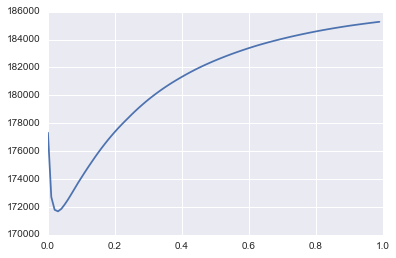

In [256]:
plt.plot(alphalist,SSElist)

In [257]:
optimal_alpha = pd.DataFrame(SSElist,alphalist).sort_values(0).index[0]

In [261]:
model = smf.OLS(ENDF_train_Y,ENDF_train_X).fit_regularized(alpha=optimal_alpha,L1_wt=0.5,maxiter=1000)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dom_gross_adj_2015   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     26.05
Date:                Wed, 27 Apr 2016   Prob (F-statistic):           4.31e-82
Time:                        19:46:50   Log-Likelihood:                -1971.8
No. Observations:                 385   AIC:                             4028.
Df Residuals:                     343   BIC:                             4194.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
runtime                            0.3576      0.177      2.015      0.045         0.009     0.707
budget                             0.2845      0.078      3.640      0.000         0.131     0.438
in_release_days                    0.6451      0.082      7.878      0.000         0.484     0.806
max_no_theaters                   -0.0622      0.011     -5.543      0.000        -0.084    -0.040
two_month_genre_density_count           0          0        nan        nan             0         0
month_genre_density_count         -0.9820      1.707     -0.575      0.565        -4.340     2.376
two_month_budget_density_count          0          0        nan        nan             0         0
month_budget_density_count        -0.6228      1.565     -0.398      0.691        -3.702     2.456
theater_squared                 2.056e-05    2.7e-06      7.625      0.000      1.53e-05  2.59e-05
Animation                        -20.2615     12.017     -1.686      0.093       -43.898     3.375
Comedy                             6.2895      8.581      0.733      0.464       -10.589    23.168
Crime                             -0.0858     18.612     -0.005      0.996       -36.694    36.522
Drama                             -6.2942     10.705     -0.588      0.557       -27.350    14.761
Family                           -18.2519     17.044     -1.071      0.285       -51.776    15.273
Fantasy                          -21.4573     17.710     -1.212      0.226       -56.291    13.376
Horror                             5.1277     11.393      0.450      0.653       -17.282    27.537
Others                            -5.2991     10.839     -0.489      0.625       -26.618    16.020
Sci-Fi                           -14.7628      9.873     -1.495      0.136       -34.182     4.657
Thriller                           6.3893     11.956      0.534      0.593       -17.127    29.906
Focus                             -5.9219     17.041     -0.348      0.728       -39.440    27.597
Fox                              -27.8110     10.133     -2.745      0.006       -47.742    -7.880
Lionsgate                          9.3532     12.196      0.767      0.444       -14.635    33.342
Open                               0.5445     17.582      0.031      0.975       -34.037    35.126
Others                            -0.4858     12.351     -0.039      0.969       -24.779    23.808
Paramount                          4.6433     11.112      0.418      0.676       -17.213    26.500
Relativity                       -13.5255     13.996     -0.966      0.335       -41.054    14.003
Sony                              -5.9744     10.518     -0.568      0.570       -26.662    14.713
TriStar                            8.2809     15.575      0.532      0.595       -22.354    38.916
Universal     

In [262]:
##Test set Adj. RSquare
ENDF_test_X = ENDF_test.iloc[:,1:]
ENDF_test_Y = ENDF_test.iloc[:,0]
x_test = np.array(ENDF_test_X)
y_test = np.array(ENDF_test_Y)
y_pred = model.predict(x_test)
y_actual = np.array(y_test)
print("R-squared: ",r2_score(y_actual,y_pred))
print("Adj. R-squared: ",1-(1-r2_score(y_actual,y_pred))*(ENDF_test_X.shape[0]-1)/(ENDF_test_X.shape[0]-ENDF_test_X.shape[1]))

R-squared:  0.619770740915
Adj. R-squared:  0.374084142738


# 6.0 OLS with EN Variable Selection

In [264]:
##Separate OLS DataFrame
OLSDF2 = opDF.copy()

##Exclude variables with zero coefficient
OLSDF2 = OLSDF2.drop(['two_month_budget_density_count','two_month_genre_density_count'],axis=1)
OLSDF2 = statsmodels.tools.tools.add_constant(OLSDF2,prepend=False)
mask = np.random.random(OLSDF2.shape[0])<0.8
OLSDF2_train = OLSDF2[mask]
OLSDF2_test = OLSDF2[~mask]

In [265]:
OLSDF2_train_Y = OLSDF2_train.iloc[:,0]
OLSDF2_train_X = OLSDF2_train.iloc[:,1:]

In [267]:
##Including everything to compare with elastic net
lm = smf.OLS(OLSDF2_train_Y,OLSDF2_train_X,hasconst=True)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dom_gross_adj_2015   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     27.41
Date:                Wed, 27 Apr 2016   Prob (F-statistic):           1.77e-85
Time:                        19:49:40   Log-Likelihood:                -2018.3
No. Observations:                 396   AIC:                             4119.
Df Residuals:                     355   BIC:                             4282.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
runtime                        0.4485      0.170      2.637      0.009         0.114     0.783
budget                         0.1800      0.076      2.355      0.019         0.030     0.330
in_release_days                0.6202      0.080      7.756      0.000         0.463     0.777
max_no_theaters               -0.0440      0.011     -4.053      0.000        -0.065    -0.023
month_genre_density_count     -2.2981      1.664     -1.381      0.168        -5.570     0.974
month_budget_density_count     0.3823      1.511      0.253      0.800        -2.589     3.354
theater_squared             1.847e-05   2.69e-06      6.868      0.000      1.32e-05  2.38e-05
Animation                    -32.8430     11.570     -2.839      0.005       -55.597   -10.089
Comedy                        -4.2563      8.076     -0.527      0.599       -20.139    11.627
Crime                        -11.1279     15.326     -0.726      0.468       -41.270    19.014
Drama                        -12.6883      9.632     -1.317      0.189       -31.632     6.255
Family                       -43.1488     19.782     -2.181      0.030       -82.053    -4.245
Fantasy                      -36.5152     16.154     -2.260      0.024       -68.285    -4.746
Horror                        -3.7626     10.769     -0.349      0.727       -24.942    17.417
Others                       -12.4114     10.010     -1.240      0.216       -32.097     7.274
Sci-Fi                       -32.1094      9.519     -3.373      0.001       -50.829   -13.390
Thriller                      -1.3007     10.947     -0.119      0.905       -22.829    20.228
Focus                         -1.3505     15.273     -0.088      0.930       -31.387    28.686
Fox                          -28.8345     10.104     -2.854      0.005       -48.705    -8.964
Lionsgate                      4.4057     11.555      0.381      0.703       -18.320    27.131
Open                          -2.7226     14.699     -0.185      0.853       -31.630    26.185
Others                        11.9456     12.182      0.981      0.327       -12.012    35.904
Paramount                      5.1918     11.008      0.472      0.637       -16.457    26.841
Relativity                   -21.0111     14.256     -1.474      0.141       -49.048     7.026
Sony                          -7.9320     10.131     -0.783      0.434       -27.857    11.993
TriStar                       14.3004     15.254      0.937      0.349       -15.699    44.300
Universal                     14.0482     11.334      1.239      0.216        -8.242    36.338
Warner                       -18.5159     10.118     -1.830      0.068       -38.415     1.383
Weinstein                    -17.3519     14.139     -1.227      0.221       -45.159    10.455
April                         -6.0619     1